In [3]:
import pdb
import numpy as np
from PIL import Image, ImageOps
import torchvision.transforms as tvf
import random
from math import ceil

from tools import transforms_tools as F

import cv2 
import matplotlib.pyplot as plt

In [18]:
def normalize(img,minimum=0,maximum=1):
    img_max = np.max(img)
    img_min = np.min(img)
    return (img-img_min)/np.abs(img_max-img_min)*(maximum-minimum)+minimum

def speckle_noise(img,var=.05,seed=42):
    normalized_img = normalize(img)
    upper_band = (12*var)**.5
    np.random.seed(seed)
    noise = np.random.uniform(-upper_band/2,upper_band/2,size=img.shape)
    noisy_img = normalized_img*(1+noise)
    noisy_img = np.clip(noisy_img,0,1)
    ret_val = normalize(noisy_img,maximum=255)
    return np.uint8(ret_val)
    
    

In [4]:
class StillTransform (object):
    """ Takes and return an image, without changing its shape or geometry.
    """
    def _transform(self, img):
        raise NotImplementedError()
        
    def __call__(self, inp):
        img = F.grab_img(inp)

        # transform the image (size should not change)
        try:
            img = self._transform(img)
        except TypeError:
            pass

        return F.update_img_and_labels(inp, img, persp=(1,0,0,0,1,0,0,0))



class PixelNoise (StillTransform):
    """ Takes an image, and add random white noise.
    """
    def __init__(self, ampl=20):
        StillTransform.__init__(self)
        assert 0 <= ampl < 255
        self.ampl = ampl

    def __repr__(self):
        return "PixelNoise(%g)" % self.ampl

    def _transform(self, img):
        img = np.float32(img)
        img += np.random.uniform(0.5-self.ampl/2, 0.5+self.ampl/2, size=img.shape)
        return Image.fromarray(np.uint8(img.clip(0,255)))



In [51]:
class PixelSpeckleNoise (StillTransform):
    """ Takes an image, and add random white noise.
    """
    def __init__(self, var=.05, seed=None):
        StillTransform.__init__(self)
        assert 0 <= var < 1
        self.var = var
        self.seed = seed

    def __repr__(self):
        return "PixelSpeckleNoise(%g)" % self.var
    
    def normalize(self, img,minimum=0, maximum=1):
        img_max = np.max(img)
        img_min = np.min(img)
        return (img-img_min)/np.abs(img_max-img_min)*(maximum-minimum)+minimum

    def _transform(self, img):
        normalized_img = self.normalize(img)
        upper_band = (12*self.var)**.5
        np.random.seed(self.seed)
        noise = np.random.uniform(-upper_band/2,upper_band/2,size=img.shape)
        noisy_img = normalized_img*(1+noise)
        noisy_img = np.clip(noisy_img,0,1)
        ret_val = self.normalize(noisy_img,maximum=255)
        return  Image.fromarray(np.uint8(ret_val))

In [52]:
img = cv2.imread("../../Data/22.png",0)

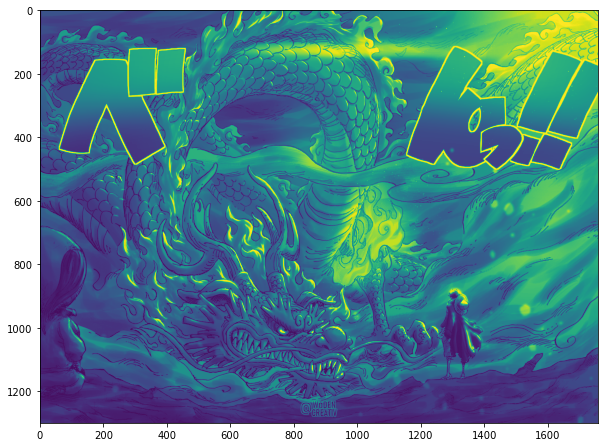

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [61]:
noise = PixelSpeckleNoise(.5)

In [62]:
n_img = noise._transform(img)

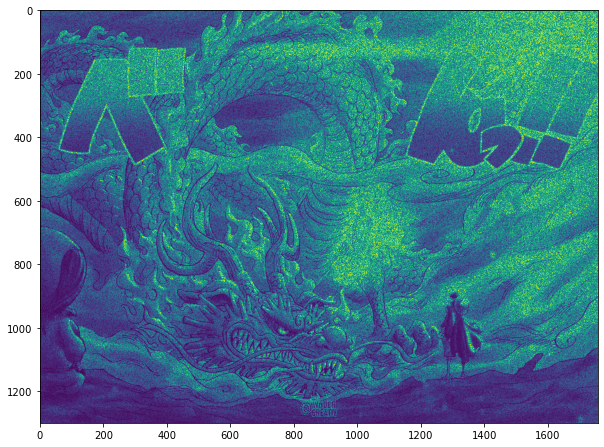

In [63]:
plt.figure(figsize=(10,10))

plt.imshow(n_img)

In [64]:
nn_img = speckle_noise(img,var=.5)

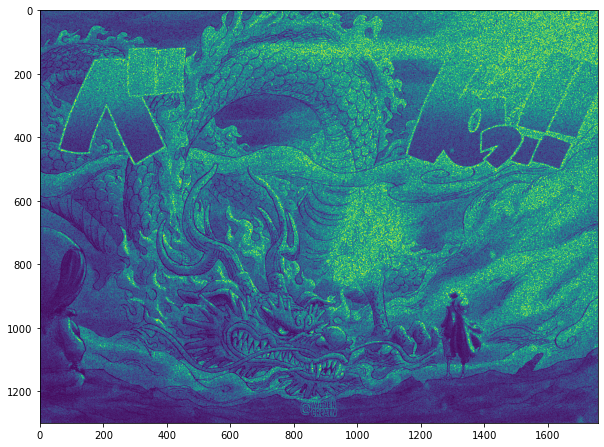

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(nn_img)

In [66]:
nn_img.min()

0

In [67]:
isdefined

NameError: name 'isdefined' is not defined